# **Predicting Breast Cancer Diagnosis using Supervised Machine Learning**

## 📌 **Step 1: Problem Definition** 
### **Objective:**
Build a machine learning model that classifies whether a tumor is benign (B (non-cancerous)) or malignant (M (cancerous)) using features extracted from digitized images of breast masses.

**Target Column:** diagnosis (M or B)

**Type:** Binary classification problem

# **Step 1: Import Required Libraries**

In [23]:
# Importing pandas library for data manipulation and analysis, especially for working with DataFrames
import pandas as pd

# Importing NumPy for numerical operations, especially useful for handling arrays and mathematical functions
import numpy as np

# Importing matplotlib for basic data visualization like line plots, bar charts, histograms etc.
import matplotlib.pyplot as plt

# Importing seaborn for advanced and beautiful statistical data visualizations (built on top of matplotlib)
import seaborn as sns

# Importing preprocessing tools from sklearn:
# - StandardScaler: used to scale/normalize features (mean = 0, std = 1) for better model performance
# - LabelEncoder: used to convert categorical labels into numeric format (e.g., 'Male' → 1, 'Female' → 0)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importing train_test_split to split the dataset into training and testing sets
# Helps evaluate the model on unseen data
from sklearn.model_selection import train_test_split

# Importing Logistic Regression model for binary classification problems (e.g., cancer = yes/no)
from sklearn.linear_model import LogisticRegression

# Importing Random Forest Classifier, an ensemble model that uses multiple decision trees to improve accuracy
from sklearn.ensemble import RandomForestClassifier

# Importing Support Vector Classifier (SVC), a powerful ML algorithm especially for high-dimensional data
from sklearn.svm import SVC

# Importing evaluation metrics:
# - accuracy_score: to check overall accuracy of predictions
# - confusion_matrix: to see true positives, false positives, etc.
# - classification_report: gives precision, recall, f1-score
# - RocCurveDisplay: to visualize ROC Curve (how well model distinguishes between classes)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

# Importing joblib to save (serialize) and load (deserialize) trained models
# Useful when you want to deploy the model or avoid retraining it again
import joblib


# **Step 2: Load Dataset**

In [45]:
# Load the dataset (ensure the CSV file is in the same directory)
df = pd.read_csv("/kaggle/input/breast-cancer-datset/breast cancer.csv")

In [46]:
# View the first few rows to understand the structure of the dataset
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Step 3: Data Cleaning**

In [47]:
# Check for NaN, inf, -inf
print(df.isnull().sum())          # Count of missing values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [48]:
# Replace infinities with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [49]:
# Optionally fill or drop missing values
df.fillna(0, inplace=True)  # Or df.dropna(inplace=True)

In [50]:
# Drop unnecessary columns (e.g., id column)
df.drop(['id'], axis = 1, inplace = True)

In [51]:
df.dropna(inplace=True)

In [52]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [53]:
# Check for NaN, inf, -inf
print(df.isnull().sum())          # Count of missing values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64


In [54]:
# Encode the 'diagnosis' column to binary (M = 1, B = 0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [55]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [56]:
# Check fo rmissing values
df.isnull().sum() # If all values are 0, no missing data

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

# **Step 4: Feature Scaling**

In [60]:
# Separate features (X) and label (y)
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [61]:
# Scale the feature data to bring all features to the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461,  0.        ],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999,  0.        ],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121,  0.        ],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916,  0.        ],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528,  0.        ],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  0.        ]])

# **Step 5: Train-Test Split**

In [63]:
# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

# **Step 6: Model Building**
# **Step 7: Model Evaluation**

# **1. Logistic Regression**
## **Train The Model**

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# **Model Evaluation of Logistic Regression**

In [65]:
#Prediction from the model
models = [lr]

# Evaluate each model using accuracy, confusion matrix, and classification report
for model in models:
    y_pred_lr = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("="*50)
    print("Accuracy:", round(accuracy_score(y_test, y_pred_lr)*100,2,),"%")
    print("="*50)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
    print("="*50)
    print("Classification Report:\n", classification_report(y_test, y_pred_lr))
    print("="*50)

Model: LogisticRegression
Accuracy: 97.37 %
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **2. Random Forest Classifier**

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# **Model Evaluation of Random Forest Classifier**

In [67]:
#Prediction from the model
models = [rf]

# Evaluate each model using accuracy, confusion matrix, and classification report
for model in models:
    y_pred_rf = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("="*50)
    print("Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100,2),"%")
    print("="*50)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
    print("="*50)
    print("Classification Report:\n", classification_report(y_test, y_pred_rf))
    print("="*50)

Model: RandomForestClassifier
Accuracy: 96.49 %
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **3. Support Vector Machine (Linear Kernel)**

In [68]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

# **Model Evaluation of Support Vector Machine (Linear Kernel)**

In [69]:
#Prediction from the model
models = [svm]

# Evaluate each model using accuracy, confusion matrix, and classification report
for model in models:
    y_pred_svm = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("="*50)
    print("Accuracy:", round(accuracy_score(y_test, y_pred_svm)*100,2,),"%")
    print("="*50)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
    print("="*50)
    print("Classification Report:\n", classification_report(y_test, y_pred_svm))
    print("="*50)

Model: SVC
Accuracy: 95.61 %
Confusion Matrix:
 [[68  3]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# **Step 8: ROC Curve Visualization (Example: Logistic Regression)**

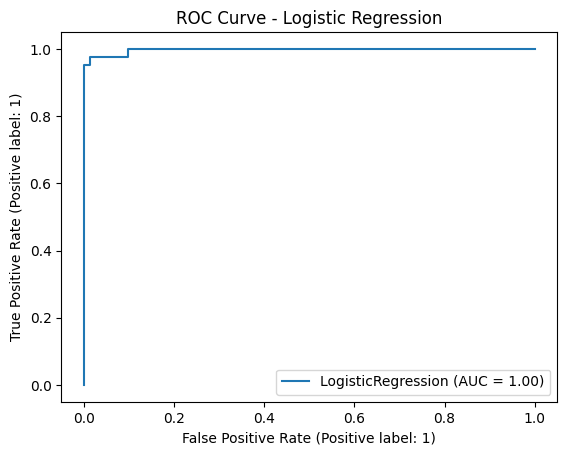

In [70]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

# **Step 9: Save the Best Model**

In [71]:
# Save the trained Random Forest model (assuming it's the best)
joblib.dump(rf, "breast_cancer_model.pkl")

['breast_cancer_model.pkl']

# **Bonus Step 10: Feature Importance Plot (Random Forest)**

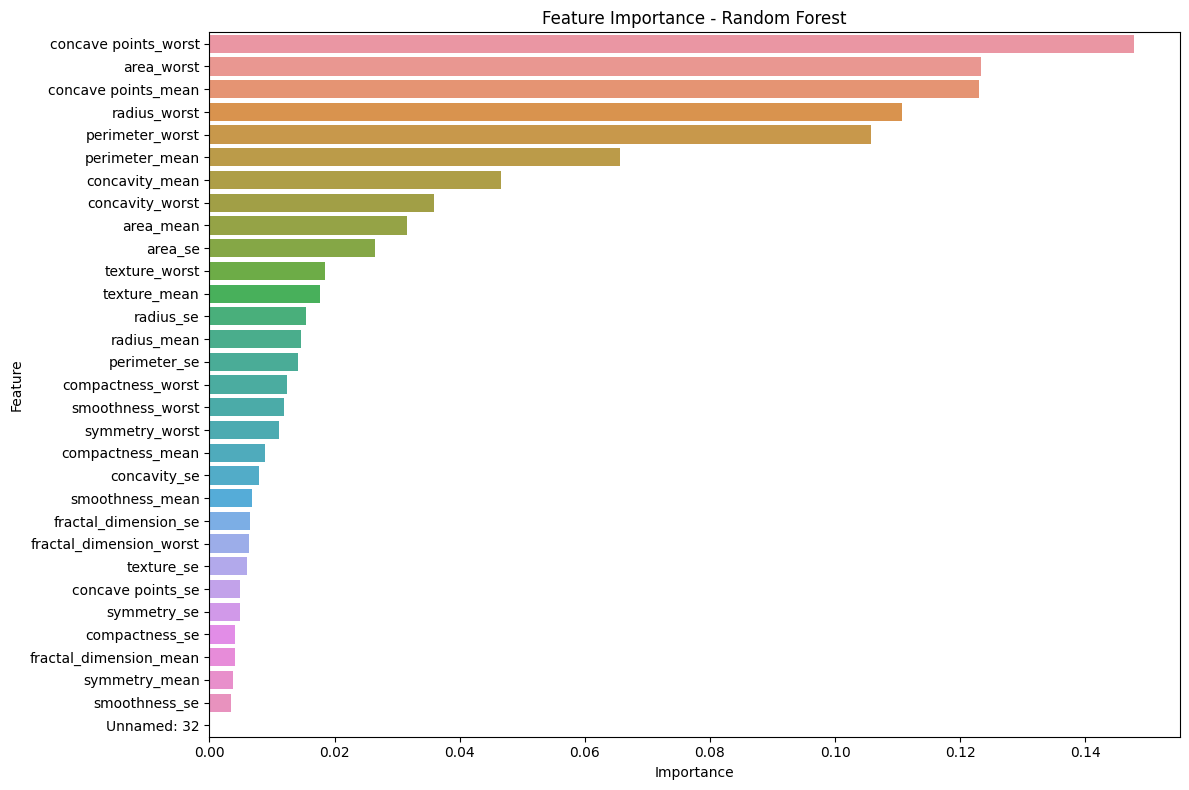

In [72]:
# Visualizing which features are most important in prediction
feature_importances = rf.feature_importances_
features = X.columns

# Create a dataframe of features and their importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()
